## -- Sales Data Analysis --

### - Importing Libraries

In [68]:
#Import the required libraries

import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import os

### - Importing the data

In [20]:
#Import the data
#As you can see we can import only one file at a time using this method
#Let's try an alternate approach
#df = pd.read_csv('./Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_April_2019.csv')
#df.head()

### - Concatenating the files 

In [22]:
#Import and merge the 12 months of sales data into a single CSV file
#We'll be using a list comprehension to achieve the desired result


files = [file for file in os.listdir('./Sales_Data')]

#Create an empty dataframe to store the concatenated csv
all_months_data = pd.DataFrame()

#Loop over all the files in the sales_data folder
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    #Concat the data
    all_months_data = pd.concat([all_months_data, df])


#Check the data
all_months_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### - Cleaning up the data

In [34]:
#Locating NaN values
#Using .any(axis=1) to find rows with atleast 1 or more NaN value

nan_df = all_months_data[all_months_data.isna().any(axis = 1)]

#Drop the NaN values
#Drop NaN rows with argument(how= all),found rows with all values as NaN
all_months_data = all_months_data.dropna(how='all')


In [36]:
#Solving for, ValueError: invalid literal for int() with base 10: 'Or'
#We noticed that these rows were duplicated column headers

all_months_data = all_months_data[all_months_data['Order Date'].str[0:2] != 'Or']


In [ ]:
#Solving for, TypeError: can't multiply sequence by non-int of type 'str'
#We'll be using pd.to_numeric()

all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered']) #Make int
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each']) #Make float


### - Augmenting data with additional columns

In [ ]:
#Now that we have the data combined, after preliminary analysis its been determined that we need some additional columns
#Begin by adding the month column using string parsing

all_months_data['Month'] = all_months_data['Order Date'].str[0:2]
all_months_data['Month'] = all_months_data['Month'].astype('int32')


In [ ]:
#Adding a sales column

all_months_data['Sales'] = all_months_data['Quantity Ordered']*all_months_data['Price Each']


In [60]:
#Adding a city column
#Extract the city name from the Purchase Address column
#Let's use the .apply() method to apply a lambda function to extract city name
#We'll use split on commas and get the second value which is city
#Just to demonstrate we can also define a function for the split and add to lambda
#We also noticed the city duplicating across states, so we will include in the column as well


def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


#Format the ouput better using string formatting
all_months_data['City'] = all_months_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")



In [61]:
#Question 1: Which month was the best for sales?
#We will use groupby month her and then sum of sales
#Answer 1: As can be seen below, December was best, January was worst
monthly_sales = all_months_data.groupby('Month').sum()

monthly_sales


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


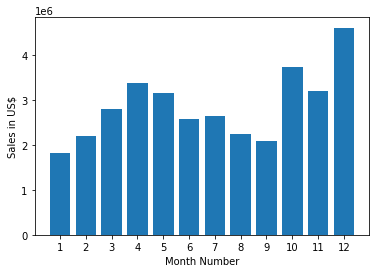

In [53]:
#Let's plot the above data

months = range(1,13) #13 because last value is exclusive

plt.bar(months, monthly_sales['Sales'])

plt.xticks(months)

plt.ylabel('Sales in US$')
plt.xlabel('Month Number')

plt.show()


In [62]:
#Question 2: Which city had the highest number of sales?
#Answer 2: San Francisco had the highest sales, hint: Silicon Valley needs more electronics, possibly more spending power

city_sales = all_months_data.groupby('City').sum()
city_sales


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


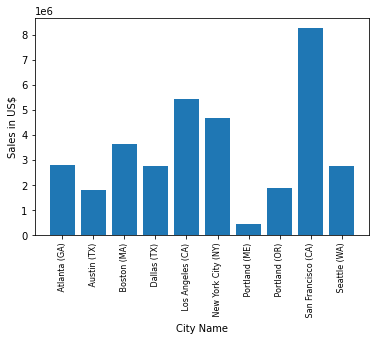

In [65]:
#Let's plot the above data
#We used a list comprehension below, so we get the city order the same as the groupby order

cities = [city for city, df in all_months_data.groupby('City')]

plt.bar(cities, city_sales['Sales'])

plt.xticks(cities, rotation='vertical', size=8)

plt.ylabel('Sales in US$')
plt.xlabel('City Name')

plt.show()


In [78]:
#Question 3: What time should we display adverstisements to maximise purchases?
#Answer 3: The chart shows us that peak orders are around 12pm and 7pm


#Begin by converting Order Date column into a date time object
all_months_data['Order Date'] = pd.to_datetime(all_months_data['Order Date'])

#Extracting the hour from the column, to create a new column called hour
all_months_data['Hour'] = all_months_data['Order Date'].dt.hour

#Extracting the minute from the column, to create a new column called minute
all_months_data['Minute'] = all_months_data['Order Date'].dt.minute

#View the updated dataframe
all_months_data.head()

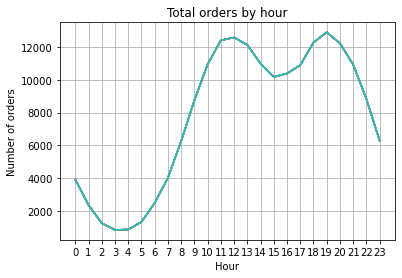

In [86]:
#Let's plot the above data

hours = [hour for hour, df in all_months_data.groupby('Hour')]

plt.plot(hours, all_months_data.groupby(['Hour']).count()) #Used count to get the number of orders per hour

plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of orders')

plt.title('Total orders by hour')

plt.grid()

plt.show()




In [88]:
#Question 4: What products best sold together the most?
#By looking at the data we saw that we could match products with order ids
#Answer 4: iphone and iphone lightning cable sold together most often

#Create a new dataframe to check for duplicate order ids
df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)] #We used the 'keep' argument here because we want to keep all the duplicates

#Group products by order id that were purchased together
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #We used pd.transform() method here to join the values from the product rows and add into the Grouped column

#Since we noticed duplicates in the grouped column, we'll be dropping them
df = df[['Order ID', 'Grouped']].drop_duplicates()

#Check the updated dataframe
df.head()



<ipython-input-88-fdb6dd01d2dd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) #We used pd.transform() method here to join the values from the product rows and add into the Grouped column


,Order ID,Grouped
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"


In [89]:
#Now we want to count the number of times that the above combinations have occured
#For this we'll import some new libraries
#Got the solution for this from Stackoverflow
#Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

#First we need to set up a Counter
count = Counter()

#Now we'll set up the sub-list to iterate through the main list
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2))) #2 since we are looking at a combination of 2 items

#Optimising the dictionary output
for key,value in count.most_common(10): #.most_common() is method present in count
    print(key, value)
    


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [91]:
#Question 5: Which product sold the most? Why do you think it sold the most?
#Answer 5: Batteries and chargers are the most ordered in terms of quantity based on price

#Start by doing a groupby on product
product_group = all_months_data.groupby('Product')

#We also want quanity ordered
quantity_ordered = product_group.sum()['Quantity Ordered']



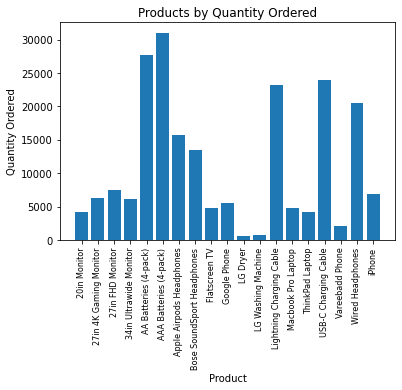

In [93]:
#Let's plot the above data
#From the initial look at the graph we can see certain products like batteries and chargers sold the most
#What we still need to establish is why they sold the most?
#We will look at the product price for this

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)

plt.xlabel('Product')
plt.ylabel('Quantity Ordered')

plt.xticks(products, rotation='vertical', size=8)
plt.title('Products by Quantity Ordered')

plt.show()


In [101]:
#Getting the product prices

prices = all_months_data.groupby('Product').mean()['Price Each']

#We can see below, that the cheapest products are batteries and chargers
#Let's try and overlay these prices on the above graph
print(prices)


Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


<ipython-input-103-cb15d7a927bf>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


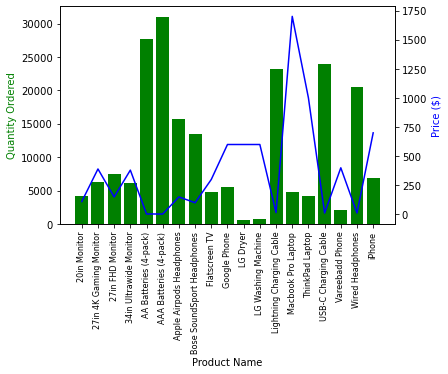

In [103]:
#To get the second Y-axis, we'll need to use sub-plots

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-') #'b-' is how the line is going to be displayed of the line chart

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

## -- The End--